In [158]:
import warnings
warnings.filterwarnings("ignore")

import tensorflow.keras
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import decode_predictions

In [159]:
model = VGG16(weights='imagenet')

In [160]:
img_path = '/Users/xxxyy/PycharmProjects/UoB/visulisation/video_image_temp/7.png'
img = image.load_img(img_path, target_size=(224,224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
print(decode_predictions(preds, top=5)[0])

[('n03617480', 'kimono', 0.7843059), ('n03045698', 'cloak', 0.035233583), ('n04479046', 'trench_coat', 0.025318692), ('n04208210', 'shovel', 0.016903758), ('n04325704', 'stole', 0.012894541)]


In [161]:
max_prob = max(preds[0].tolist())
max_prob_index = preds[0].tolist().index(max_prob)
print('max probability: ', max_prob)
print('max probability index: ', max_prob_index)

max probability:  0.7843058705329895
max probability index:  614


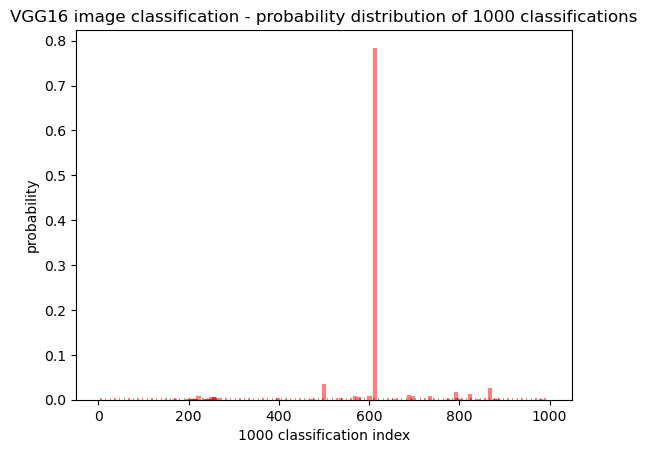

In [162]:
x = np.arange(1000)
y = preds[0]
plt.bar(x, y, alpha=0.5, width=0.3, color='yellow', edgecolor='red', lw=3)
plt.title('VGG16 image classification - probability distribution of 1000 classifications')
plt.xlabel('1000 classification index')
plt.ylabel('probability')
plt.show()

## VGG16 different layer visualisation

In [163]:
from tensorflow.keras import  backend as K
from tensorflow.keras.applications import vgg16

vgg16 = vgg16.VGG16(weights='imagenet')

In [164]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_27 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

### Storage the information from different layers

In [165]:
from collections import OrderedDict # 有序字典：按照输入数据的先后进行存储
layer_dict = OrderedDict()

for layer in vgg16.layers[1:]:
    layer_dict[layer.name] = layer

In [166]:
layer_dict

OrderedDict([('block1_conv1',
              <tensorflow.python.keras.layers.convolutional.Conv2D at 0x7f8f64db07c0>),
             ('block1_conv2',
              <tensorflow.python.keras.layers.convolutional.Conv2D at 0x7f8dc44bfb50>),
             ('block1_pool',
              <tensorflow.python.keras.layers.pooling.MaxPooling2D at 0x7f8bb438d2e0>),
             ('block2_conv1',
              <tensorflow.python.keras.layers.convolutional.Conv2D at 0x7f8e85b780d0>),
             ('block2_conv2',
              <tensorflow.python.keras.layers.convolutional.Conv2D at 0x7f8bb4391640>),
             ('block2_pool',
              <tensorflow.python.keras.layers.pooling.MaxPooling2D at 0x7f8bb4398160>),
             ('block3_conv1',
              <tensorflow.python.keras.layers.convolutional.Conv2D at 0x7f8bb439fca0>),
             ('block3_conv2',
              <tensorflow.python.keras.layers.convolutional.Conv2D at 0x7f8bb8da5eb0>),
             ('block3_conv3',
              <tensorflow.py

### input, preprocessing image

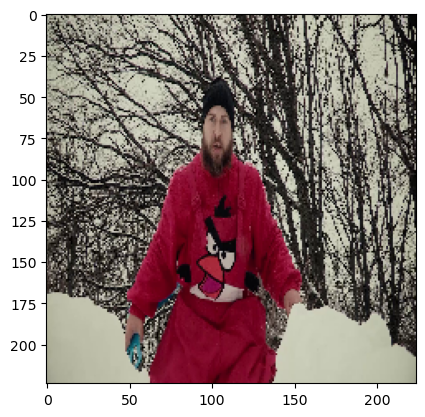

In [167]:
img_path = '/Users/xxxyy/PycharmProjects/UoB/visulisation/video_image_temp/7.png'
img = image.load_img(img_path, target_size=(224,224))
plt.imshow(img)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


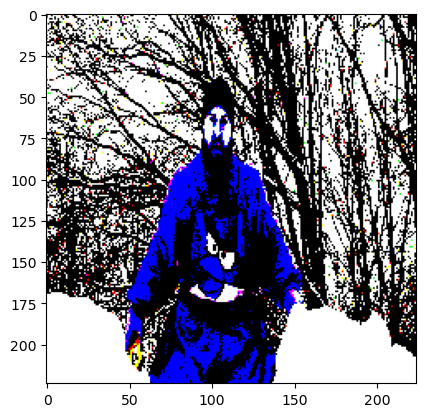

In [168]:
input_img_data = image.img_to_array(img)
input_img_data = preprocess_input(input_img_data)

plt.imshow(input_img_data)
plt.show()

In [169]:
input_img_data

array([[[  49.060997 ,   44.221    ,   36.32     ],
        [  25.060997 ,   29.221    ,   20.32     ],
        [ -23.939003 ,  -19.779    ,  -28.68     ],
        ...,
        [ -98.939    , -111.779    , -120.68     ],
        [ -97.939    , -111.779    , -116.68     ],
        [  33.060997 ,   14.221001 ,   10.32     ]],

       [[  -1.939003 ,   -6.7789993,  -14.68     ],
        [  38.060997 ,   42.221    ,   33.32     ],
        [  51.060997 ,   55.221    ,   46.32     ],
        ...,
        [ -97.939    , -110.779    , -119.68     ],
        [ -97.939    , -111.779    , -116.68     ],
        [ -91.939    , -108.779    , -112.68     ]],

       [[ -28.939003 ,  -33.779    ,  -41.68     ],
        [  54.060997 ,   58.221    ,   49.32     ],
        [  31.060997 ,   35.221    ,   26.32     ],
        ...,
        [ -98.939    , -108.779    , -117.68     ],
        [ -98.939    , -109.779    , -114.68     ],
        [ -98.939    , -109.779    , -114.68     ]],

       ...,

      

In [170]:
input_img_data = np.expand_dims(input_img_data, axis=0)
print('image dimension: ', input_img_data.shape)

image dimension:  (1, 224, 224, 3)


### output layer visualisation

In [171]:
def get_activation(model, layer, input_img_data):
    #Get the output of the model from the first level of input data to the last level
    activation_f = K.function([model.layers[0].input, K.learning_phase()], [layer.output,])
    activations = activation_f((input_img_data, False))
    return activations

### block1_conv1 layer feature map
#### 64 convolution kernels, generating 64 feature maps. Usually basic features: colours, edges, holes, etc.

In [172]:
layer_name = 'block1_conv1'
layer = layer_dict[layer_name]
activation = get_activation(vgg16, layer, input_img_data)
activated_img = activation[0][0]

In [173]:
activated_img.shape

(224, 224, 64)

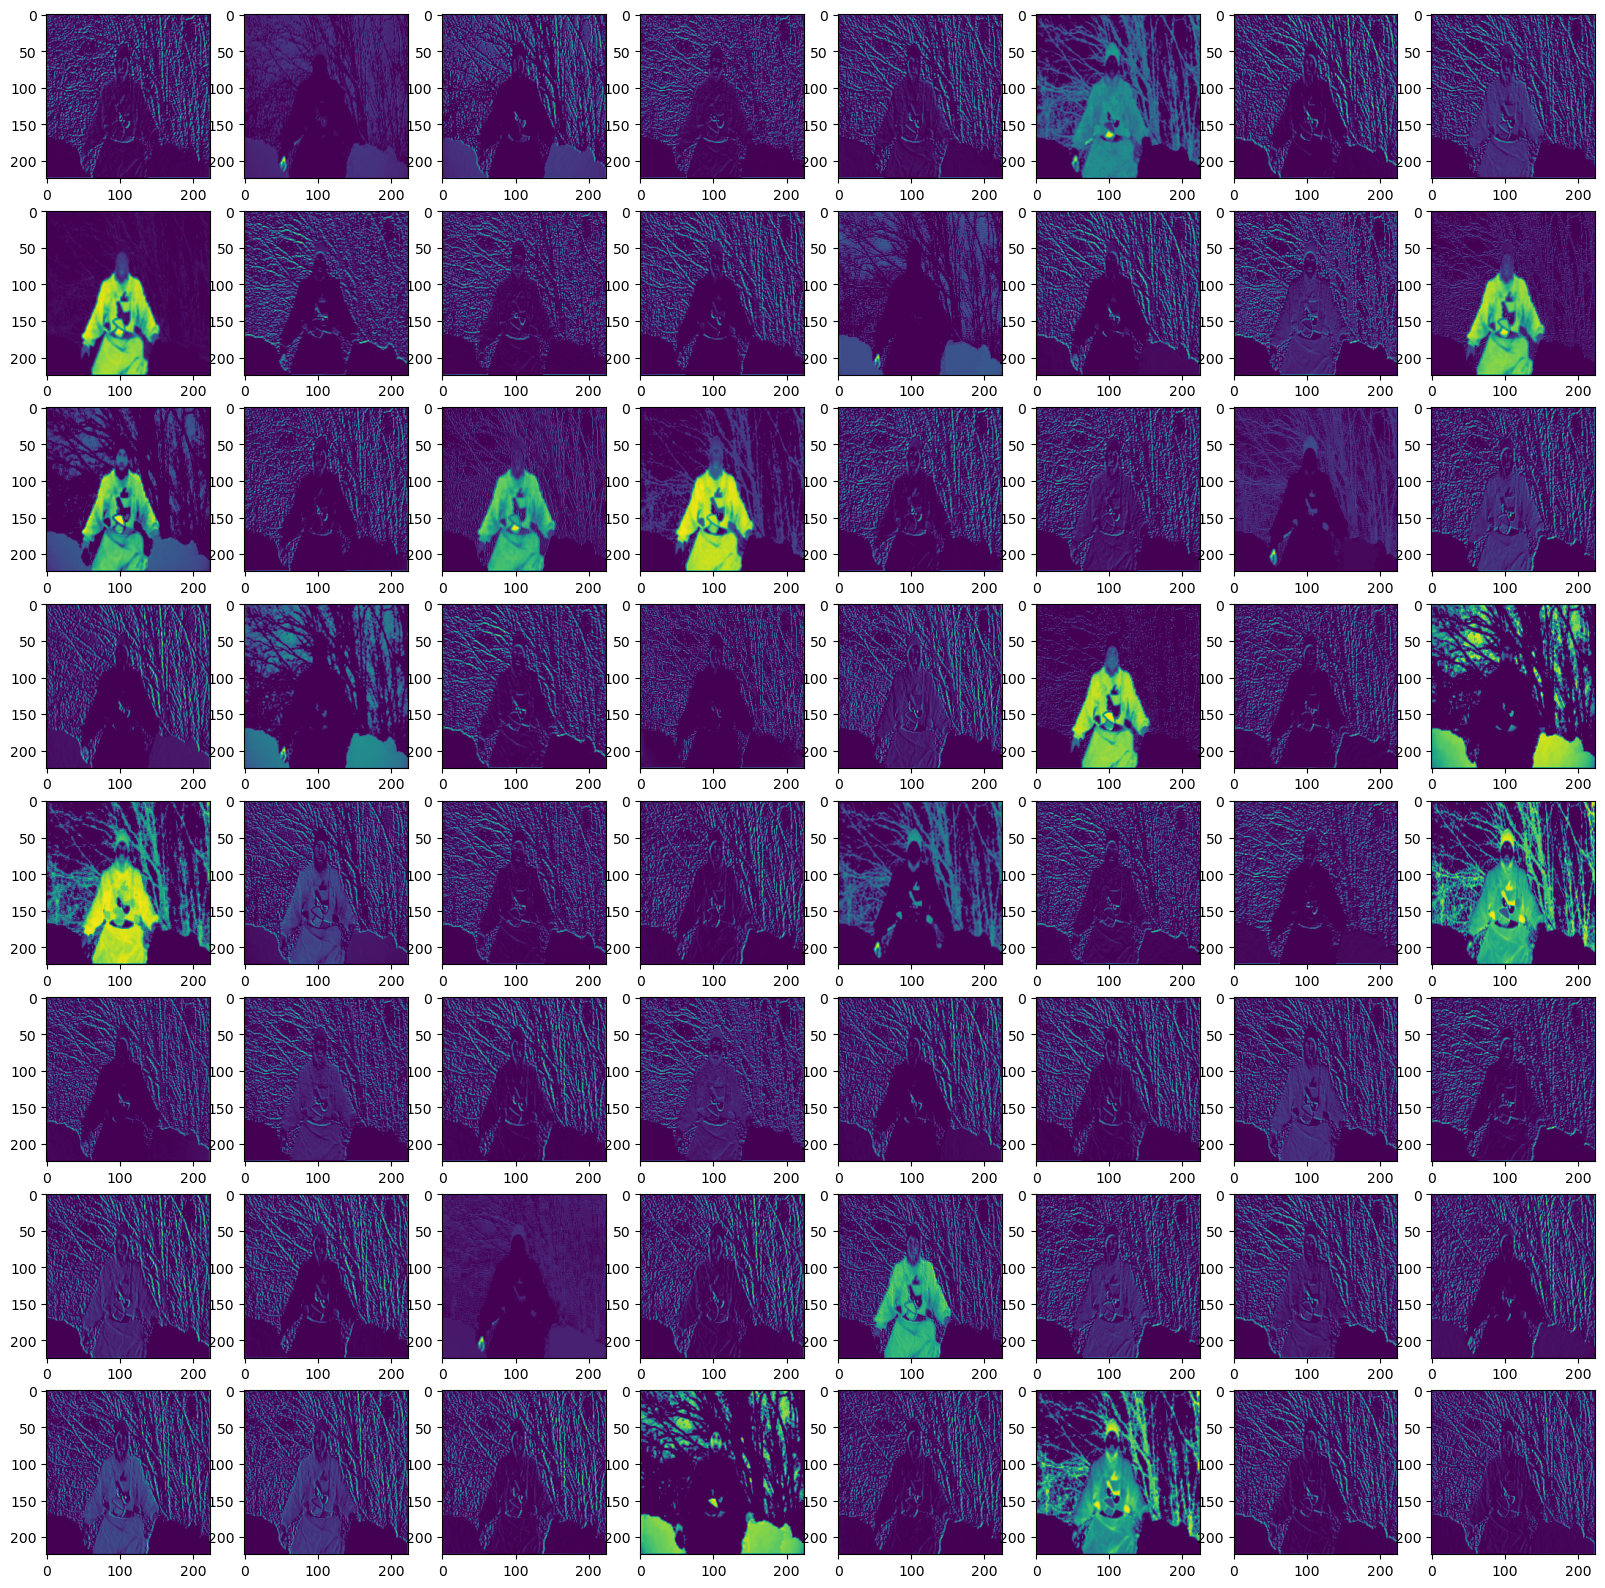

In [174]:
n = 8
fig = plt.figure(figsize=(20,20))
for i in range(n):
    for j in range(n):
        idx = (n*i)+j
        ax = fig.add_subplot(n, n, idx+1)
        ax.imshow(activated_img[:,:,idx])

In [175]:
layer.filters

64

In [176]:
conv_img_mean = np.mean(activated_img, axis=2)
conv_img_mean.shape

(224, 224)

TypeError: title() missing 1 required positional argument: 'label'

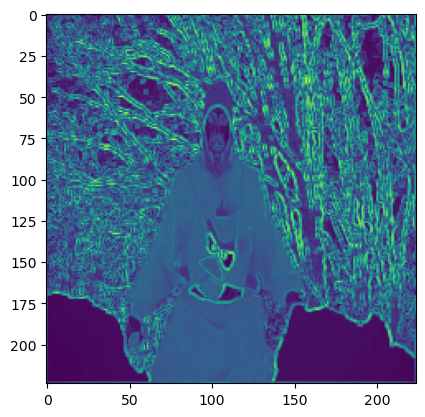

In [177]:
plt.imshow(np.mean(activated_img, axis=2))
plt.title()
plt.xlabel()
plt.show()